The main goal for this project is to be able to predict a starting 5 lineup's statistics when playing with each other. This includes: Points, Rebounds, Assists, Blocks, Steals, etc. An important unit that I wanted to utilize in this project was usage rate, as the model should be able to priortize the statistics of players with higher usage rates (typically 20+% usage rate) over those with lower usage rates (less than 20%).

**Basis Analysis:**

To start, I got a dataset of the needed NBA players from the BallDontLie API and read it as a dataframe. Then, I created a for loop to iterate through each unique team and calculate the team statistics required for usage rate for each individual player. The usage rate formula is as follows:

Usage Rate = 100 * ((FGA + 0.44 * FTA + TOV) * (Tm MP / 5)) / (MP * (Tm FGA + 0.44 * Tm FTA + Tm TOV))

Once this was calculated, the data was simply appended the results to the data frame.  

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

df = pd.read_excel('nba_tidyfinal.xlsx')

teams = list(df['team.abbreviation'].unique())

appended_data = []

#iterates through each team
for ind_team in teams:
    #name each team temp 
    temp = df.loc[df['team.abbreviation'] == ind_team]
    #calculate ind_team total minutes played
    temp['TmMP'] = temp['mpg'].sum()
    #calculate ind_team total fga
    temp['TmFGA'] = temp['fga'].sum()
    #calculate ind_team total fta
    temp['TmFTA'] = temp['fta'].sum()
    #calculate ind_team total turnover rate
    temp['TmTOV'] = temp['turnover'].sum()
    #calculate indiv player usage metric within ind_team... usage formula online
    temp['usage'] = 100 * ((temp['fga'] + 0.44 * temp['fta'] + temp['turnover']) * (temp['TmMP'] / 5)) / (temp['mpg'] * (temp['TmFGA'] + 0.44 * temp['TmFTA'] + temp['TmTOV']))
    print(ind_team)
    
    appended_data.append(temp)
    
    
appended_data = pd.concat(appended_data)

appended_data


MEM
MIA
MIL
CLE
MIN
CHI
TOR
PHX
DET
ORL
SAC
WAS
SAS
LAC
UTA
DAL
LAL
ATL
BOS
DEN
NYK
BKN
GSW
PHI
POR
OKC
HOU
NOP
CHA
IND


<ipython-input-1-51d8b3ea17d4>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['TmMP'] = temp['mpg'].sum()
<ipython-input-1-51d8b3ea17d4>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['TmFGA'] = temp['fga'].sum()
<ipython-input-1-51d8b3ea17d4>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

,id,first_name,last_name,full_name,height_feet,height_inches,actual_height_ft,position,weight_pounds,team.id,team.abbreviation,team.city,team.conference,team.division,team.full_name,team.name,mpg,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,ft_pct,oreb,dreb,reb,ast,blk,stl,pf,turnover,pts,TmMP,TmFGA,TmFTA,TmTOV,usage
0,3,Steven,Adams,Steven Adams,7,0,7.000000,C,265,15,MEM,Memphis,West,Southwest,Memphis Grizzlies,Grizzlies,26.100000,3.11,5.33,0.583,0.00,0.00,0.000,0.78,2.56,0.304,4.67,6.44,11.11,2.56,1.56,0.78,2.44,2.11,7.00,246.566667,96.39,25.22,15.32,13.179526
1,66,Dillon,Brooks,Dillon Brooks,6,6,6.500000,G-F,220,15,MEM,Memphis,West,Southwest,Memphis Grizzlies,Grizzlies,17.766667,3.89,8.89,0.438,1.89,3.78,0.500,1.00,1.56,0.643,0.22,1.33,1.56,1.33,0.00,0.44,2.00,0.89,10.67,246.566667,96.39,25.22,15.32,23.655565
2,249,Tyus,Jones,Tyus Jones,6,2,6.166667,G,196,15,MEM,Memphis,West,Southwest,Memphis Grizzlies,Grizzlies,24.000000,4.89,10.67,0.458,1.56,4.44,0.350,0.44,1.00,0.444,0.33,1.67,2.00,4.22,0.11,0.67,0.67,1.22,11.78,246.566667,96.39,25.22,15.32,20.629741
3,3198,Ja,Morant,Ja Morant,6,3,6.250000,G,174,15,MEM,Memphis,West,Southwest,Memphis Grizzlies,Grizzlies,33.200000,10.30,21.50,0.480,2.10,5.20,0.403,6.60,8.50,0.782,1.20,4.90,6.20,6.80,0.30,1.20,1.80,3.90,29.30,246.566667,96.39,25.22,15.32,35.244667
4,3199,Desmond,Bane,Desmond Bane,6,5,6.420000,G,215,15,MEM,Memphis,West,Southwest,Memphis Grizzlies,Grizzlies,33.500000,8.30,17.80,0.465,3.80,8.50,0.451,4.30,4.80,0.912,0.50,4.40,4.90,4.80,0.30,0.60,2.40,2.30,24.70,246.566667,96.39,25.22,15.32,26.624705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,3130,Jalen,Smith,Jalen Smith,6,9,6.750000,F,215,12,IND,Indiana,East,Central,Indiana Pacers,Pacers,24.000000,4.20,9.50,0.435,1.20,4.10,0.302,1.50,2.20,0.679,1.80,5.80,7.50,1.10,0.80,0.20,2.20,1.50,11.00,230.033333,87.33,22.74,15.75,20.287279
342,3131,Oshae,Brissett,Oshae Brissett,6,7,6.580000,F,210,12,IND,Indiana,East,Central,Indiana Pacers,Pacers,10.900000,0.90,2.40,0.368,0.40,1.50,0.250,0.60,0.80,0.833,0.60,1.00,1.60,0.40,0.00,0.30,0.50,0.50,2.80,230.033333,87.33,22.74,15.75,12.137731
343,3132,Isaiah,Jackson,Isaiah Jackson,6,9,6.750000,F,205,12,IND,Indiana,East,Central,Indiana Pacers,Pacers,18.300000,3.20,5.20,0.618,0.00,0.10,0.000,1.90,2.80,0.676,1.50,3.50,5.10,1.20,1.40,0.50,2.60,1.20,8.40,230.033333,87.33,22.74,15.75,16.966831
344,3133,Aaron,Nesmith,Aaron Nesmith,6,5,6.420000,F,215,12,IND,Indiana,East,Central,Indiana Pacers,Pacers,20.800000,2.40,6.30,0.386,1.00,3.40,0.290,1.00,1.20,0.818,0.30,2.80,3.10,1.60,0.80,0.30,2.60,1.00,6.90,230.033333,87.33,22.74,15.75,15.310908


The appended data then gets converted into a csv file.

In [ ]:
appended_data.to_csv('nba_analysis.csv')

Before starting with the machine learning, I wanted to get some simple analysis on the usage rate numbers, looking at things such as min, max, mean, and top 10.

In [ ]:
appended_data["usage"].mean()

18.743516333882702

Average usage rate around the league was around 18.74%

In [ ]:
appended_data["usage"].min()

5.259976210129468

The lower usage rate for any player in the league is around 5.25%.

In [ ]:
appended_data["usage"].idxmin()

70

In [ ]:
df.iloc[70]

id                                   206
first_name                       Juancho
last_name                    Hernangomez
full_name            Juancho Hernangomez
height_feet                            6
height_inches                          9
actual_height_ft                    6.75
position                               F
weight_pounds                        230
team.id                               28
team.abbreviation                    TOR
team.city                        Toronto
team.conference                     East
team.division                   Atlantic
team.full_name           Toronto Raptors
team.name                        Raptors
mpg                                 2.55
fgm                                  0.0
fga                                 0.22
fg_pct                               0.0
fg3m                                 0.0
fg3a                                0.22
fg3_pct                              0.0
ftm                                  0.0
fta             

This player is Juancho Hernangomez.

In [ ]:
appended_data["usage"].max()

39.965433067522376

The highest usage rate for any player in the league is around 39.96%.

In [ ]:
appended_data["usage"].idxmax()

176

In [ ]:
df.iloc[176]

id                                132
first_name                       Luka
last_name                      Doncic
full_name                 Luka Doncic
height_feet                         6
height_inches                       7
actual_height_ft             6.583333
position                          F-G
weight_pounds                     218
team.id                             7
team.abbreviation                 DAL
team.city                      Dallas
team.conference                  West
team.division               Southwest
team.full_name       Dallas Mavericks
team.name                   Mavericks
mpg                              36.5
fgm                             12.38
fga                              23.5
fg_pct                          0.527
fg3m                             2.13
fg3a                             8.13
fg3_pct                         0.262
ftm                              9.13
fta                             11.63
ft_pct                          0.785
oreb        

This player is Luka Doncic.

In [ ]:
appended_data["usage"].nlargest(10)

176    39.965433
23     37.646220
202    35.798669
3      35.244667
264    34.659545
280    34.362346
242    33.078748
117    32.743981
287    32.530404
253    32.186698
Name: usage, dtype: float64

The top 10 usage rates in the league are all above 30%.

Next, we need to implement a function that will prompt a user to enter a starting lineup of 5 nba players taking into account the "Full_name" variable in the dataset. If the player is misspelled wrong in any way, the program will prompt the user to re-enter the name. Each player has its own unique function, and at the end we want the machine to return all 5 of the players that were entered with their corresponding statistics.

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

df = pd.read_csv('nba_analysis.csv')

def locate_1():
    print('Please enter your team of Five!: \n')
    
    t = True
    while t:
        a = input('Name of Point Guard: ')
        if a in list(df['full_name']):
            t = False
            return a
        else:
            print('\n')
            print('Name not recognized, please try again.')


def locate_2():
    
    t = True
    while t:
        b = input('Name of Shooting Guard: ')
        if b in list(df['full_name']):
            t = False
            return b
        else:
            print('\n')
            print('Name not recognized, please try again.')



def locate_3():
    
    t = True
    while t:
        a = input('Name of Small Forward: ')
        if a in list(df['full_name']):
            t = False
            return a
        else:
            print('\n')
            print('Name not recognized, please try again.')
            
def locate_4():
    
    t = True
    while t:
        a = input('Name of Power Forward: ')
        if a in list(df['full_name']):
            t = False
            return a
        else:
            print('\n')
            print('Name not recognized, please try again.')

def locate_5():
   
    t = True
    while t:
        a = input('Name of Center: ')
        if a in list(df['full_name']):
            t = False
            return a
        else:
            print('\n')
            print('Name not recognized, please try again.')

def team_builder():
    a = locate_1()
    b = locate_2()
    c = locate_3()
    d = locate_4()
    e = locate_5()
    return [a,b,c,d,e]

def locater(a):
    appended_data = []
    for i in a:
        new_loc = df.loc[df['full_name'] == i]
        #print(i)
        appended_data.append(new_loc)
    appended_data = pd.concat(appended_data)
    return appended_data

In [ ]:
#builds team
nam = team_builder()

#creates df
t = locater(nam)

Please enter your team of Five!: 

Name of Point Guard: Ja Morant
Name of Shooting Guard: Desmond Bane
Name of Small Forward: Kevin Durant
Name of Power Forward: LeBron James
Name of Center: Ivica Zubax


Name not recognized, please try again.
Name of Center: Ivica Zubac


In [ ]:
t

,Unnamed: 0,id,first_name,last_name,full_name,height_feet,height_inches,actual_height_ft,position,weight_pounds,team.id,team.abbreviation,team.city,team.conference,team.division,team.full_name,team.name,mpg,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,ft_pct,oreb,dreb,reb,ast,blk,stl,pf,turnover,pts,TmMP,TmFGA,TmFTA,TmTOV,usage
3,3,3198,Ja,Morant,Ja Morant,6,3,6.250000,G,174,15,MEM,Memphis,West,Southwest,Memphis Grizzlies,Grizzlies,33.200000,10.30,21.50,0.480,2.1,5.20,0.403,6.60,8.50,0.782,1.20,4.90,6.20,6.80,0.30,1.20,1.80,3.90,29.3,246.566667,96.39,25.22,15.32,35.244667
4,4,3199,Desmond,Bane,Desmond Bane,6,5,6.420000,G,215,15,MEM,Memphis,West,Southwest,Memphis Grizzlies,Grizzlies,33.500000,8.30,17.80,0.465,3.8,8.50,0.451,4.30,4.80,0.912,0.50,4.40,4.90,4.80,0.30,0.60,2.40,2.30,24.7,246.566667,96.39,25.22,15.32,26.624705
244,242,140,Kevin,Durant,Kevin Durant,6,9,6.750000,F,240,3,BKN,Brooklyn,East,Atlantic,Brooklyn Nets,Nets,37.200000,10.50,20.30,0.517,1.7,5.10,0.333,8.80,9.30,0.946,0.40,5.80,6.20,4.80,2.00,0.80,2.30,3.50,31.5,237.600000,84.10,24.80,12.70,33.078748
190,189,237,LeBron,James,LeBron James,6,8,6.666667,F,250,14,LAL,Los Angeles,West,Pacific,Los Angeles Lakers,Lakers,36.366667,9.38,21.63,0.434,1.5,7.25,0.207,3.75,5.13,0.732,1.75,7.38,9.13,7.50,0.88,1.13,2.25,3.75,24.0,238.866667,88.67,23.89,13.85,32.120050
160,159,493,Ivica,Zubac,Ivica Zubac,7,1,7.083333,C,240,13,LAC,LA,West,Pacific,LA Clippers,Clippers,29.433333,4.22,6.78,0.623,0.0,0.11,0.000,1.56,2.67,0.583,2.44,9.11,11.56,1.44,2.78,0.33,3.00,2.22,10.0,244.466667,84.68,19.80,15.63,15.503221


The demo above shows an example of how the program would take in 5 different players and return the stats of eahc individual player. By the end of this analysis, we want the program to take into account the regression model that we deem to be the most accurate and compute the predicted statistics of each player based on that. 

**Regression Analysis:**

Once the basis analysis is completed, we move on to the machine learning aspect of the project. First I read in our new and transformed data set as a dataframe. Note that throughout the regressional analysis we will often be using Luka Doncic's usage rate as the value to predict points per game.

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

df = pd.read_csv('nba_analysis.csv')

In [ ]:
df

,Unnamed: 0,id,first_name,last_name,full_name,height_feet,height_inches,actual_height_ft,position,weight_pounds,team.id,team.abbreviation,team.city,team.conference,team.division,team.full_name,team.name,mpg,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,ft_pct,oreb,dreb,reb,ast,blk,stl,pf,turnover,pts,TmMP,TmFGA,TmFTA,TmTOV,usage
0,0,3,Steven,Adams,Steven Adams,7,0,7.000000,C,265,15,MEM,Memphis,West,Southwest,Memphis Grizzlies,Grizzlies,26.100000,3.11,5.33,0.583,0.00,0.00,0.000,0.78,2.56,0.304,4.67,6.44,11.11,2.56,1.56,0.78,2.44,2.11,7.00,246.566667,96.39,25.22,15.32,13.179526
1,1,66,Dillon,Brooks,Dillon Brooks,6,6,6.500000,G-F,220,15,MEM,Memphis,West,Southwest,Memphis Grizzlies,Grizzlies,17.766667,3.89,8.89,0.438,1.89,3.78,0.500,1.00,1.56,0.643,0.22,1.33,1.56,1.33,0.00,0.44,2.00,0.89,10.67,246.566667,96.39,25.22,15.32,23.655565
2,2,249,Tyus,Jones,Tyus Jones,6,2,6.166667,G,196,15,MEM,Memphis,West,Southwest,Memphis Grizzlies,Grizzlies,24.000000,4.89,10.67,0.458,1.56,4.44,0.350,0.44,1.00,0.444,0.33,1.67,2.00,4.22,0.11,0.67,0.67,1.22,11.78,246.566667,96.39,25.22,15.32,20.629741
3,3,3198,Ja,Morant,Ja Morant,6,3,6.250000,G,174,15,MEM,Memphis,West,Southwest,Memphis Grizzlies,Grizzlies,33.200000,10.30,21.50,0.480,2.10,5.20,0.403,6.60,8.50,0.782,1.20,4.90,6.20,6.80,0.30,1.20,1.80,3.90,29.30,246.566667,96.39,25.22,15.32,35.244667
4,4,3199,Desmond,Bane,Desmond Bane,6,5,6.420000,G,215,15,MEM,Memphis,West,Southwest,Memphis Grizzlies,Grizzlies,33.500000,8.30,17.80,0.465,3.80,8.50,0.451,4.30,4.80,0.912,0.50,4.40,4.90,4.80,0.30,0.60,2.40,2.30,24.70,246.566667,96.39,25.22,15.32,26.624705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,341,3130,Jalen,Smith,Jalen Smith,6,9,6.750000,F,215,12,IND,Indiana,East,Central,Indiana Pacers,Pacers,24.000000,4.20,9.50,0.435,1.20,4.10,0.302,1.50,2.20,0.679,1.80,5.80,7.50,1.10,0.80,0.20,2.20,1.50,11.00,230.033333,87.33,22.74,15.75,20.287279
344,342,3131,Oshae,Brissett,Oshae Brissett,6,7,6.580000,F,210,12,IND,Indiana,East,Central,Indiana Pacers,Pacers,10.900000,0.90,2.40,0.368,0.40,1.50,0.250,0.60,0.80,0.833,0.60,1.00,1.60,0.40,0.00,0.30,0.50,0.50,2.80,230.033333,87.33,22.74,15.75,12.137731
345,343,3132,Isaiah,Jackson,Isaiah Jackson,6,9,6.750000,F,205,12,IND,Indiana,East,Central,Indiana Pacers,Pacers,18.300000,3.20,5.20,0.618,0.00,0.10,0.000,1.90,2.80,0.676,1.50,3.50,5.10,1.20,1.40,0.50,2.60,1.20,8.40,230.033333,87.33,22.74,15.75,16.966831
346,344,3133,Aaron,Nesmith,Aaron Nesmith,6,5,6.420000,F,215,12,IND,Indiana,East,Central,Indiana Pacers,Pacers,20.800000,2.40,6.30,0.386,1.00,3.40,0.290,1.00,1.20,0.818,0.30,2.80,3.10,1.60,0.80,0.30,2.60,1.00,6.90,230.033333,87.33,22.74,15.75,15.310908


Next, we import all of the needed libraries to do regressional analysis.

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score

In our simple regression, we will analyze the relationship between usage rate and points. First, we will create a simple scatterplot to visualize this relationship.

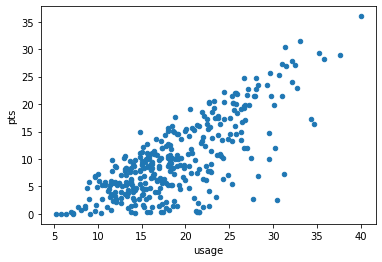

In [ ]:
df.plot.scatter(x='usage', y='pts')

We notice that there is a positive association between the two variables. As the usage rate of a player increases, the amount of points that player averages in a season also increases.

With this in mind, we split our data 50-50 for our training and test datasets.

In [ ]:
nba_train = df.loc[:173].copy()
nba_test = df.loc[174:].copy()

In [ ]:
nba_train

,Unnamed: 0,id,first_name,last_name,full_name,height_feet,height_inches,actual_height_ft,position,weight_pounds,team.id,team.abbreviation,team.city,team.conference,team.division,team.full_name,team.name,mpg,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,ft_pct,oreb,dreb,reb,ast,blk,stl,pf,turnover,pts,TmMP,TmFGA,TmFTA,TmTOV,usage
0,0,3,Steven,Adams,Steven Adams,7,0,7.000000,C,265,15,MEM,Memphis,West,Southwest,Memphis Grizzlies,Grizzlies,26.100000,3.11,5.33,0.583,0.00,0.00,0.000,0.78,2.56,0.304,4.67,6.44,11.11,2.56,1.56,0.78,2.44,2.11,7.00,246.566667,96.39,25.22,15.32,13.179526
1,1,66,Dillon,Brooks,Dillon Brooks,6,6,6.500000,G-F,220,15,MEM,Memphis,West,Southwest,Memphis Grizzlies,Grizzlies,17.766667,3.89,8.89,0.438,1.89,3.78,0.500,1.00,1.56,0.643,0.22,1.33,1.56,1.33,0.00,0.44,2.00,0.89,10.67,246.566667,96.39,25.22,15.32,23.655565
2,2,249,Tyus,Jones,Tyus Jones,6,2,6.166667,G,196,15,MEM,Memphis,West,Southwest,Memphis Grizzlies,Grizzlies,24.000000,4.89,10.67,0.458,1.56,4.44,0.350,0.44,1.00,0.444,0.33,1.67,2.00,4.22,0.11,0.67,0.67,1.22,11.78,246.566667,96.39,25.22,15.32,20.629741
3,3,3198,Ja,Morant,Ja Morant,6,3,6.250000,G,174,15,MEM,Memphis,West,Southwest,Memphis Grizzlies,Grizzlies,33.200000,10.30,21.50,0.480,2.10,5.20,0.403,6.60,8.50,0.782,1.20,4.90,6.20,6.80,0.30,1.20,1.80,3.90,29.30,246.566667,96.39,25.22,15.32,35.244667
4,4,3199,Desmond,Bane,Desmond Bane,6,5,6.420000,G,215,15,MEM,Memphis,West,Southwest,Memphis Grizzlies,Grizzlies,33.500000,8.30,17.80,0.465,3.80,8.50,0.451,4.30,4.80,0.912,0.50,4.40,4.90,4.80,0.30,0.60,2.40,2.30,24.70,246.566667,96.39,25.22,15.32,26.624705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,168,297,Lauri,Markkanen,Lauri Markkanen,7,0,7.000000,F,240,29,UTA,Utah,West,Northwest,Utah Jazz,Jazz,33.800000,8.40,16.30,0.515,2.00,6.70,0.299,3.40,4.00,0.850,2.20,7.10,9.30,2.70,0.90,0.70,1.80,1.80,22.20,232.900000,88.70,20.50,14.50,24.388875
170,169,358,Kelly,Olynyk,Kelly Olynyk,7,0,7.000000,F,240,29,UTA,Utah,West,Northwest,Utah Jazz,Jazz,27.100000,4.60,8.20,0.561,1.90,3.20,0.594,1.60,2.40,0.667,1.40,2.70,4.10,3.40,0.60,1.50,4.60,2.50,12.70,232.900000,88.70,20.50,14.50,18.006094
171,170,413,Collin,Sexton,Collin Sexton,6,2,6.166667,G,190,29,UTA,Utah,West,Northwest,Utah Jazz,Jazz,21.800000,4.60,9.70,0.474,1.30,3.30,0.394,3.10,3.70,0.838,1.20,1.70,2.90,1.90,0.10,0.80,2.40,1.70,13.60,232.900000,88.70,20.50,14.50,24.805642
172,171,457,Jarred,Vanderbilt,Jarred Vanderbilt,6,9,6.750000,F,214,29,UTA,Utah,West,Northwest,Utah Jazz,Jazz,25.300000,3.70,6.60,0.561,0.60,1.10,0.545,1.00,1.50,0.667,2.20,6.00,8.20,3.10,0.50,1.50,4.00,1.90,9.00,232.900000,88.70,20.50,14.50,15.028103


In [ ]:
nba_test

,Unnamed: 0,id,first_name,last_name,full_name,height_feet,height_inches,actual_height_ft,position,weight_pounds,team.id,team.abbreviation,team.city,team.conference,team.division,team.full_name,team.name,mpg,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,ft_pct,oreb,dreb,reb,ast,blk,stl,pf,turnover,pts,TmMP,TmFGA,TmFTA,TmTOV,usage
174,173,3170,Walker,Kessler,Walker Kessler,7,1,7.080000,C,245,29,UTA,Utah,West,Northwest,Utah Jazz,Jazz,14.900000,2.50,3.50,0.696,0.00,0.00,0.000,0.70,1.40,0.500,2.30,3.10,5.40,0.70,1.60,0.20,1.80,0.70,5.60,232.900000,88.70,20.50,14.50,13.416197
175,174,75,Reggie,Bullock,Reggie Bullock,6,7,6.583333,G-F,205,7,DAL,Dallas,West,Southwest,Dallas Mavericks,Mavericks,31.500000,2.00,5.88,0.340,1.63,4.75,0.342,0.38,0.63,0.600,0.63,2.38,3.00,1.00,0.25,1.13,3.00,0.88,6.00,246.083333,82.18,29.65,12.73,10.184853
176,175,130,Spencer,Dinwiddie,Spencer Dinwiddie,6,6,6.500000,G,210,7,DAL,Dallas,West,Southwest,Dallas Mavericks,Mavericks,32.750000,6.63,13.75,0.482,2.75,6.50,0.423,1.25,1.75,0.714,0.13,2.50,2.63,4.25,0.00,1.38,2.75,1.63,17.25,246.083333,82.18,29.65,12.73,22.481570
177,176,132,Luka,Doncic,Luka Doncic,6,7,6.583333,F-G,218,7,DAL,Dallas,West,Southwest,Dallas Mavericks,Mavericks,36.500000,12.38,23.50,0.527,2.13,8.13,0.262,9.13,11.63,0.785,1.13,7.63,8.75,8.63,0.50,1.88,3.25,3.38,36.00,246.083333,82.18,29.65,12.73,39.965433
178,177,158,Dorian,Finney-Smith,Dorian Finney-Smith,6,8,6.666667,F,220,7,DAL,Dallas,West,Southwest,Dallas Mavericks,Mavericks,32.616667,3.13,7.13,0.439,1.38,4.50,0.306,0.25,0.63,0.400,1.63,2.63,4.25,0.63,0.63,0.88,2.50,0.88,7.88,246.083333,82.18,29.65,12.73,11.583336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,341,3130,Jalen,Smith,Jalen Smith,6,9,6.750000,F,215,12,IND,Indiana,East,Central,Indiana Pacers,Pacers,24.000000,4.20,9.50,0.435,1.20,4.10,0.302,1.50,2.20,0.679,1.80,5.80,7.50,1.10,0.80,0.20,2.20,1.50,11.00,230.033333,87.33,22.74,15.75,20.287279
344,342,3131,Oshae,Brissett,Oshae Brissett,6,7,6.580000,F,210,12,IND,Indiana,East,Central,Indiana Pacers,Pacers,10.900000,0.90,2.40,0.368,0.40,1.50,0.250,0.60,0.80,0.833,0.60,1.00,1.60,0.40,0.00,0.30,0.50,0.50,2.80,230.033333,87.33,22.74,15.75,12.137731
345,343,3132,Isaiah,Jackson,Isaiah Jackson,6,9,6.750000,F,205,12,IND,Indiana,East,Central,Indiana Pacers,Pacers,18.300000,3.20,5.20,0.618,0.00,0.10,0.000,1.90,2.80,0.676,1.50,3.50,5.10,1.20,1.40,0.50,2.60,1.20,8.40,230.033333,87.33,22.74,15.75,16.966831
346,344,3133,Aaron,Nesmith,Aaron Nesmith,6,5,6.420000,F,215,12,IND,Indiana,East,Central,Indiana Pacers,Pacers,20.800000,2.40,6.30,0.386,1.00,3.40,0.290,1.00,1.20,0.818,0.30,2.80,3.10,1.60,0.80,0.30,2.60,1.00,6.90,230.033333,87.33,22.74,15.75,15.310908


**Simple Linear Regression Model:**

We will use the Ashen Model for our simple linear regression model. The code process is as follows:

In [ ]:
ashen_model = LinearRegression()
ashen_model.fit(
    X= nba_train[['usage']],
    y= nba_train['pts']
)

LinearRegression()

In [ ]:
ashen_model.predict(
    X= nba_test[['usage']]
)

array([ 5.38785706,  2.69045499, 12.95528174, 27.55013859,  3.85785514,
       14.46140658,  2.45647379, 13.12032843,  0.18529962,  6.74347677,
       16.30265643,  3.92099123,  1.51916742,  7.80356695, 15.40300821,
        5.89371677, 21.00111456,  6.88990275, 11.96956921, 16.18000135,
        4.28772178,  4.28537586,  8.41684356,  6.06294893,  7.17994283,
        4.51619131,  5.7118493 ,  7.26212694, 15.71448079, 24.07188444,
        5.57489418, 10.6187487 ,  6.88721347, 16.14894443, 19.8343515 ,
        8.60736162,  4.71910716,  9.36526732,  2.35586378,  7.94541607,
       20.36728931,  4.01629972,  5.26735727,  3.94039154,  6.52425641,
        7.47397384,  5.08085817, 10.07723023,  8.34436433, 13.13547027,
        7.55686863, 15.28604669, 11.74223009,  8.99615792, 12.17542949,
       18.82715869, 13.601697  ,  9.24913546,  5.24669768, 12.21383787,
       15.54880873,  3.21717579, 14.97723329,  7.59449996, 15.74596253,
       10.70369634,  4.73333573, 11.77203227,  1.79661536,  5.69

In [ ]:
ashen_model.coef_

array([0.83476156])

In [ ]:
ashen_model.intercept_

-5.811468492551885

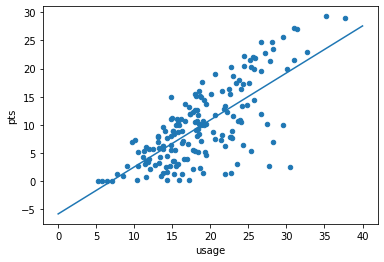

In [ ]:
X_new = pd.DataFrame()
# create a sequence of 200 evenly spaced numbers from 10 to 41
X_new["usage"] = np.linspace(0, 40, num=200)

# create a Series out of the predicted values
# (trailing underscore indicates fitted values)
y_new_ = pd.Series(
    ashen_model.predict(X_new), # y values in Series.plot.line()
    index=X_new["usage"]    # x values in Series.plot.line()
)

# plot the data, then the model
nba_train.plot.scatter(x="usage", y="pts")
y_new_.plot.line()

In [ ]:
result = ashen_model.intercept_ + (ashen_model.coef_ * 39.965433067522376)

In [ ]:
result

array([27.55013859])

The simple linear model predicts a high usage rate player like Luka Doncic to average around 27.5 points a season. Given that Luka Doncic has averaged around 26.8 points per game in his career, this is a very accurate prediction.

The equation generated from the simple linear regression to predict a player's points is:

Points = 0.83476156(Usage Rate) - 5.811468492551885

**Complex Linear Regression Model:**

Next, we will test the complex linear model with a single categorical variable (position) and multiple quantitative variables (usage, actual height, weight). We will need to create pipelines and utilize the OneHotEncoder library in order to achieve this. The process for creating this regression is shown below:

In [ ]:
ct = make_column_transformer(
    (StandardScaler(), ["usage", "actual_height_ft", "weight_pounds"]),
    (OneHotEncoder(), ["position"]),
    remainder="drop"  # all other columns in X will be dropped.
)
ct

pipeline = make_pipeline(
    ct,
    LinearRegression()
)


pipeline.fit(X=df[["usage", "actual_height_ft", "weight_pounds", "position"]], 
             y=df["pts"])

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['usage', 'actual_height_ft',
                                                   'weight_pounds']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['position'])])),
                ('linearregression', LinearRegression())])

In [ ]:
x_test = pd.Series()
x_test["usage"] = 20
x_test["actual_height_ft"] = 6.25
x_test["weight_pounds"] = 190
x_test["position"] = "G"
pipeline.predict(X=pd.DataFrame([x_test]))

<ipython-input-29-cda8e106cb3a>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  x_test = pd.Series()


array([10.64185141])

The model predicts that a Guard that is 6 foot 4 inches, weighs 190 pounds, and has a usage rate of 30% will average around 10.82 points in a given season. This seems to be a lot lower than what we would expect, since players will 32% usage rates will typically average around 15-20 points per game.

In [ ]:
x_test = pd.Series()
x_test["usage"] = 39.96543307
x_test["actual_height_ft"] = 6.583333333
x_test["weight_pounds"] = 218
x_test["position"] = "F-G"
pipeline.predict(X=pd.DataFrame([x_test]))

<ipython-input-30-9a58381daa9c>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  x_test = pd.Series()


array([28.00432534])

The model predicts that a player such as Luka Doncic would average around 28 points per game in a given season. This seems a lot more accurate than the previous prediction and indicates that the model would probably favor players with super high usage rates.

Additionally, we also tried a complex linear regression without actual height and weight as variables of interest.

In [ ]:
ct = make_column_transformer(
    (StandardScaler(), ["usage"]),
    (OneHotEncoder(), ["position"]),
    remainder="drop"  # all other columns in X will be dropped.
)
ct

pipeline = make_pipeline(
    ct,
    LinearRegression()
)


pipeline.fit(X=df[["usage", "position"]], 
             y=df["pts"])

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(), ['usage']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['position'])])),
                ('linearregression', LinearRegression())])

In [ ]:
x_test = pd.Series()
x_test["usage"] = 20
x_test["position"] = "G"
pipeline.predict(X=pd.DataFrame([x_test]))

<ipython-input-32-900f3511fa5d>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  x_test = pd.Series()


array([10.82137057])

In [ ]:
x_test = pd.Series()
x_test["usage"] = 39.96543307
x_test["position"] = "F-G"
pipeline.predict(X=pd.DataFrame([x_test]))

<ipython-input-33-2cf4fde45bf6>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  x_test = pd.Series()


array([27.99371652])

The new model predicts similar point averages compared to the linear model with multiple quantitative variables.

**Simple K-Nearest Neighbors Model:**

The third model we will look at is a simple K Nearest Neighbors Model with just usage and points as the variable of interest. Our k-value we will be using is 3. The process for implementing this regression is shown below:

In [ ]:
X_train = df[["usage"]]
y_train = df["pts"]
x_new = pd.DataFrame()
x_new["usage"] = [39.96543307]
k = 4
pipeline = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor(n_neighbors=k)
)
pipeline.fit(X = X_train, y = y_train)
pipeline.predict(X = x_new)

array([30.63])

The model predicts someone of Luka Doncic's caliber to average around 30.63 points per game, which is pretty close to his season statistics.

In [ ]:
predictions = pd.DataFrame()
predictions["k"] = list(range(1,101))

for i in range(len(predictions)):
  pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors = predictions.loc[i, "k"])
  )

  pipeline.fit(X = X_train, y = y_train)
  predictions.loc[i, "prediction"] = pipeline.predict(X = x_new)

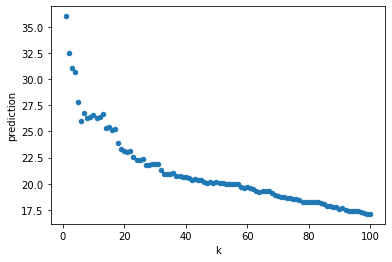

In [ ]:
predictions.plot.scatter(x = "k", y = "prediction")

We can see from the visualization how the predictions for point values decreases as the value of k decreases for this particular model.

**Complex K-Nearest Neighbors Model:**

The final model we will look at is the Complex K-Nearest Neighbors Model, which uses one categorical variable and multiple quantitative variables, similar to the complex linear model. The process to implement this regression is shown below:

In [ ]:
ct = make_column_transformer(
    (StandardScaler(), ["usage", "actual_height_ft", "weight_pounds"]),
    (OneHotEncoder(), ["position"]),
    remainder="drop"  # all other columns in X will be dropped.
)
ct

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['usage', 'actual_height_ft',
                                  'weight_pounds']),
                                ('onehotencoder', OneHotEncoder(),
                                 ['position'])])

In [ ]:
pipeline = make_pipeline(
    ct,
    KNeighborsRegressor(n_neighbors=3)
)

pipeline.fit(X=df[["usage", "actual_height_ft", "weight_pounds", "position"]], 
             y=df["pts"])

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['usage', 'actual_height_ft',
                                                   'weight_pounds']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['position'])])),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbors=3))])

In [ ]:
x_test = pd.Series()
x_test["usage"] = 39.96543307
x_test["actual_height_ft"] = 6.583333333
x_test["weight_pounds"] = 218
x_test["position"] = "F-G"
pipeline.predict(X=pd.DataFrame([x_test]))

<ipython-input-39-9a58381daa9c>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  x_test = pd.Series()


array([31.11])

This model predicts a player like Luka Doncic will average around 31.11 points per game in a season, which is also pretty close to Luka Doncic's season average.

**Simple K-Nearest Validation:**

We want to be able to see how far off the point predictions are for the simple k-nearest model on average. This process is shown below:

In [ ]:
X_train = nba_train[["usage"]]
y_train = nba_train["pts"]

pipeline = make_pipeline(
          StandardScaler(),
          KNeighborsRegressor(n_neighbors=3)
)

pipeline.fit(X=X_train, y=y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbors=3))])

In [ ]:
# Calculate the model predictions on the training data.
y_train_ = pipeline.predict(X=X_train)
y_train_

array([ 6.93333333, 10.55666667, 12.79666667, 27.1       , 18.76666667,
        4.77666667,  5.83333333, 14.21      ,  8.2       ,  8.2       ,
        7.13      , 10.55666667, 19.93333333,  8.27666667,  8.5       ,
        6.7       ,  6.66666667,  3.15333333, 18.76666667,  5.92666667,
       11.54666667, 11.98666667,  4.46666667, 27.1       ,  3.95666667,
        2.68333333, 18.8       ,  5.39      ,  8.16666667,  4.37      ,
       10.84333333,  8.16666667,  0.        ,  9.44333333,  8.89333333,
        6.11666667, 10.03666667, 25.23      ,  2.81      ,  9.5       ,
       16.32      ,  8.2       ,  4.77666667,  2.68333333,  3.53333333,
        4.42      ,  9.73      , 10.05333333,  0.        , 10.1       ,
       18.83333333, 18.8       , 11.33      ,  3.46666667, 11.86      ,
        9.36666667,  0.40666667,  4.        , 18.5       ,  9.36666667,
       15.72666667,  4.55333333, 18.8       , 13.23333333,  7.14333333,
        5.71      ,  6.10666667, 10.2       , 11.98666667,  1.64

In [ ]:
# Calculate the mean-squared error.
mse = ((y_train - y_train_) ** 2).mean()
mse

15.61737196679438

In [ ]:
mean_squared_error(y_train, y_train_)

15.61737196679438

In [ ]:
rmse = np.sqrt(mse)
rmse

3.951882079059847

This shows us that the model is, on average, 3.95 points off on their prediction for an individual player's points, which is pretty good.

**Complex K-Nearest Validation/Compatability:**

Next, we want to look at the validation/compatability score for the Complex K-Nearst Model. This process will be shown below:

In [ ]:
ct = make_column_transformer(
    (OneHotEncoder(), ["position"]),
    remainder="passthrough"  # all other columns in X will be dropped.
)

ct2 = StandardScaler(with_mean = 0)

pipeline = make_pipeline(
    ct,
    ct2,
    KNeighborsRegressor(n_neighbors = 3)
)

pipeline.fit(X=df[["usage", "actual_height_ft", "weight_pounds", "position"]], 
             y=df["pts"])

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['position'])])),
                ('standardscaler', StandardScaler(with_mean=0)),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbors=3))])

In [ ]:
pipeline = make_pipeline(
    ct,
    KNeighborsRegressor(n_neighbors=10)
)

pipeline.fit(X=df[["usage", "actual_height_ft", "weight_pounds", "position"]], 
             y=df["pts"])

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['position'])])),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbors=10))])

In [ ]:
y = df["pts"]
y_train = pipeline.predict(df[["usage", "actual_height_ft", "weight_pounds", "position"]])
r2_score(y, y_train)

0.5643135546777549

This shows us that the Complex K-Nearest Model has a compatability rate (or the proportion of variance for a dependent variable explained by an independent variable) of around 56.4%, which isn't the best.

Now, we will compare the validation scores for the Simple and Complex Regression Models using negative mean squared error values.

**Simple Linear Regression vs. Simple K-Nearest Neighbors Regression Validation:**

The process of comparing Simple Linear Regression vs. Simple K-Nearest Neighbors Regression Validation is as follows:

In [ ]:
# Train linear regression model
linear_model = LinearRegression()
linear_model.fit(X=df[["usage"]], y=df["pts"])

# Train 10-nearest neighbors model
knn_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor(n_neighbors=3)
)
knn_model.fit(X=df[["usage"]], y=df["pts"])

new_player = [[39.96543307]]
linear_model.predict(new_player), knn_model.predict(new_player)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


(array([27.83531863]), array([31.07333333]))

In [ ]:
np.mean([
    linear_model.predict(new_player),
    knn_model.predict(new_player)
])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


29.454325982565003

In [ ]:
for model in [linear_model, knn_model]:
    print(-cross_val_score(model, X=df[["usage"]], y=df["pts"], cv=5,
                           scoring="neg_mean_squared_error").mean())

21.23598640164944
28.80140806303197


From this, we can clearly see that the simple linear regression model has a lower negative mean squared error value than the simple k-nearest neighbors model, making it the better choice of the 2 models.

Additionally, we can also analyze the ensemble model to see if it is better than both models individually. 

In [ ]:
ensemble_model = VotingRegressor([
    ("linear", linear_model), 
    ("knn", knn_model)
])
ensemble_model.fit(X=df[["usage"]], y=df["pts"])
ensemble_model.predict(new_player)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([29.45432598])

In [ ]:
for model in [linear_model, knn_model, ensemble_model]:
    print(-cross_val_score(model, X=df[["usage"]], y=df["pts"], cv=5,
                           scoring="neg_mean_squared_error").mean())

21.23598640164944
28.80140806303197
23.376419713514487


We notice that the ensemble model is better than the simple k-nearest neighbors model, but the simple linear regression model still has the lowest negative mean squared error value of the 3 models.

**Complex Linear Regression vs. Complex K-Nearest Neighbors Validation:**

In [ ]:
ct = make_column_transformer(
    (OneHotEncoder(), ["position"]),
    remainder="passthrough"  # all other columns in X will be dropped.
)
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(),
                                 ['position'])])

In [ ]:
X_train = df[["usage", "actual_height_ft", "weight_pounds", "position"]]
y_train = df["pts"]

lin_model = make_pipeline(
    ct, 
    LinearRegression()
)

# Train linear regression model
lin_model.fit(X=X_train, y=y_train)

ct = make_column_transformer(
    (StandardScaler(), ["usage", "actual_height_ft", "weight_pounds"]),
    (OneHotEncoder(), ["position"]),
    remainder="drop"  # all other columns in X will be dropped.
)
ct

pipeline = make_pipeline(
    ct,
    KNeighborsRegressor(n_neighbors=3)
)

pipeline.fit(X=df[["usage", "actual_height_ft", "weight_pounds", "position"]], 
             y=df["pts"])

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['usage', 'actual_height_ft',
                                                   'weight_pounds']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['position'])])),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbors=3))])

In [ ]:
x_test = pd.Series()
x_test["usage"] = 39.96543307
x_test["actual_height_ft"] = 6.583333333
x_test["weight_pounds"] = 218
x_test["position"] = "F-G"
x_test = pd.DataFrame([x_test])
x_test
lin_model.predict(x_test)

<ipython-input-55-a556cd37abbc>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  x_test = pd.Series()


array([28.00432534])

In [ ]:
pipeline.predict(x_test)

array([31.11])

In [ ]:
np.mean([
    lin_model.predict(x_test),
    pipeline.predict(x_test)
])

29.55716267106812

In [ ]:
for model in [lin_model, pipeline]:
    print(-cross_val_score(model, X=X_train, y=y_train, cv=5,
                           scoring="neg_mean_squared_error").mean())

21.970983297385267
26.3512195794801


From this, we can clearly see that the complex linear regression model has a lower negative mean squared error value than the complex k-nearest neighbors model, making it the better choice of the 2 models.

Looking at the ensemble model as well:

In [ ]:
ensemble_model = VotingRegressor([
    ("linear", lin_model), 
    ("knn", pipeline)
])
ensemble_model.fit(X=X_train, y=y_train)
ensemble_model.predict(x_test)

array([29.55716267])

In [ ]:
for model in [lin_model, pipeline, ensemble_model]:
    print(-cross_val_score(model, X=X_train, y=y_train, cv=5,
                           scoring="neg_mean_squared_error").mean())

21.970983297385267
26.3512195794801
22.26189055358858


The ensemble model is better than the complex k-nearest neighbors model, but worse than the complex linear regression model.

Overall, when we put the 4 models together with their cross-validation scores, we see that the simple linear regression just slightly edges out the complex linear regression in terms of having the lowest negative mean squared error, making it the model we use to make our predictions for any 5 players playing together in a starting lineup.

# RUN THESE FUNCTIONS

**Updated Function:**

The updated function initialized from the beginning is shown below:

Load in DataFrame:

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

df = pd.read_csv('nba_analysis.csv')

Function set below reads in player from our database:

In [ ]:
def locate_1():
    print('Please enter your team of Five!: \n')
    
    t = True
    while t:
        a = input('Name of Point Guard: ')
        if a in list(df['full_name']):
            t = False
            return a
        else:
            print('\n')
            print('Name not recognized, please try again.')


def locate_2():
    
    t = True
    while t:
        b = input('Name of Shooting Guard: ')
        if b in list(df['full_name']):
            t = False
            return b
        else:
            print('\n')
            print('Name not recognized, please try again.')



def locate_3():
    
    t = True
    while t:
        a = input('Name of Small Forward: ')
        if a in list(df['full_name']):
            t = False
            return a
        else:
            print('\n')
            print('Name not recognized, please try again.')
            
def locate_4():
    
    t = True
    while t:
        a = input('Name of Power Forward: ')
        if a in list(df['full_name']):
            t = False
            return a
        else:
            print('\n')
            print('Name not recognized, please try again.')

def locate_5():
   
    t = True
    while t:
        a = input('Name of Center: ')
        if a in list(df['full_name']):
            t = False
            return a
        else:
            print('\n')
            print('Name not recognized, please try again.')

def team_builder():
    a = locate_1()
    b = locate_2()
    c = locate_3()
    d = locate_4()
    e = locate_5()
    return [a,b,c,d,e]

def locater(a):
    appended_data = []
    for i in a:
        new_loc = df.loc[df['full_name'] == i]
        #print(i)
        appended_data.append(new_loc)
    appended_data = pd.concat(appended_data)
    return appended_data


Function below updates usage rate with new user created team and runs prediction:

In [ ]:
def forcasted(old_team):

    new = []
    #name each team temp 
    temp = old_team.copy()
    #calculate ind_team total minutes played
    temp['new_TmMP'] = temp['mpg'].sum()
    #calculate ind_team total fga
    temp['new_TmFGA'] = temp['fga'].sum()
    #calculate ind_team total fta
    temp['new_TmFTA'] = temp['fta'].sum()
    #calculate ind_team total turnover rate
    temp['new_TmTOV'] = temp['turnover'].sum()
    #calculate indiv player usage metric within ind_team... usage formula online
    temp['new_usage'] = 100 * ((temp['fga'] + 0.44 * temp['fta'] + temp['turnover']) * (temp['new_TmMP'] / 5)) / (temp['mpg'] * (temp['new_TmFGA'] + 0.44 * temp['new_TmFTA'] + temp['new_TmTOV']))


    new.append(temp)


    new = pd.concat(new)

    new['pts'] = 0.83476156 * new['new_usage'] - 5.556495932455569

    new['reb'] = 0.15413808 * new['new_usage'] + 0.9763377142292433

    new['ast'] = 0.17393668 * new['new_usage'] - 0.3528002733591336

    new['stl'] = 0.02194919 * new['new_usage'] + 0.22063825643570223
    
    mer = pd.DataFrame()

    mer['full_name'] = old_team['full_name']
    
    mer['old_usage'] = old_team['usage']
    
    mer['new_usage'] = new['new_usage']

    mer['old_points'] = old_team['pts']

    mer['new_points'] = new['pts']

    mer['old_rebound'] = old_team['reb']

    mer['new_rebound'] = new['reb']

    mer['old_assist'] = old_team['ast']

    mer['new_assist'] = new['ast']

    mer['old_steal'] = old_team['stl']

    mer['new_steal'] = new['stl']

    return mer


These commands bring all the functions togther and builds comparison:

In [ ]:
builder = team_builder()
#old team is the orginal statistics
old_team = locater(builder)
nba_prediction = forcasted(old_team)

Please enter your team of Five!: 

Name of Point Guard: Ja Morant
Name of Shooting Guard: Desmond Bane
Name of Small Forward: Kevin Durant
Name of Power Forward: Khem Birchg


Name not recognized, please try again.
Name of Power Forward: Khem Birch
Name of Center: Ivica Zubac


Check out the comparison!!!

#RUN THESE BELOW TO SEE ANALYSIS

In [ ]:
nba_prediction

,full_name,old_usage,new_usage,old_points,new_points,old_rebound,new_rebound,old_assist,new_assist,old_steal,new_steal
193,Russell Westbrook,26.344613,36.722932,13.50,25.098396,5.75,6.636740,4.88,6.034665,1.13,1.026677
175,Reggie Bullock,10.184853,13.161959,6.00,5.430602,3.00,3.005097,1.00,1.936547,1.13,0.509533
178,Dorian Finney-Smith,11.583336,14.969229,7.88,6.939241,4.25,3.283666,0.63,2.250898,0.88,0.549201
317,Garrett Temple,8.140678,11.109822,0.67,3.717556,0.11,2.688784,0.11,1.579605,0.11,0.464490
69,Khem Birch,8.500035,12.320884,1.00,4.728504,0.56,2.875455,0.11,1.790253,0.33,0.491072


**Points**

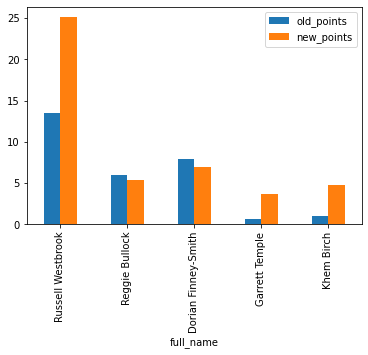

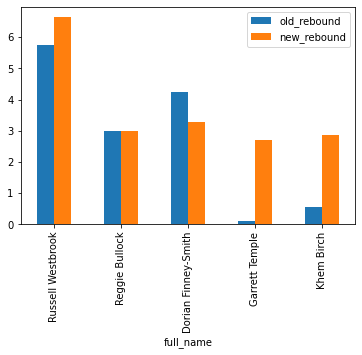

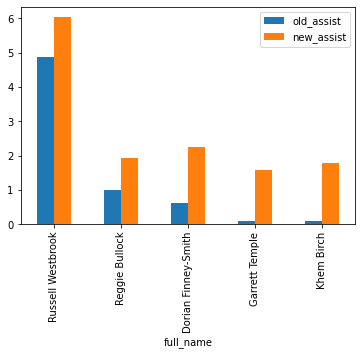

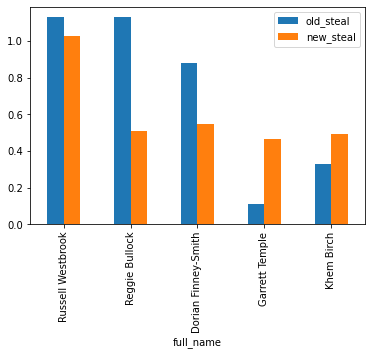

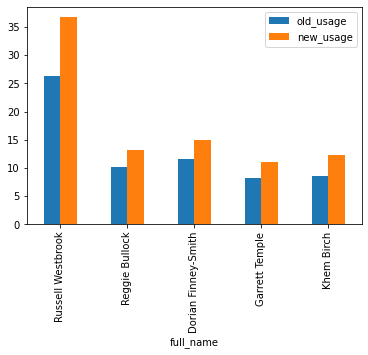

In [ ]:
points = nba_prediction.plot(x="full_name", y=["old_points", "new_points"], kind="bar")
rebounds = nba_prediction.plot(x="full_name", y=["old_rebound", "new_rebound"], kind="bar")
assists = nba_prediction.plot(x="full_name", y=["old_assist", "new_assist"], kind="bar")
steals = nba_prediction.plot(x="full_name", y=["old_steal", "new_steal"], kind="bar")
usage = nba_prediction.plot(x="full_name", y=["old_usage", "new_usage"], kind="bar")



**Rebounds**

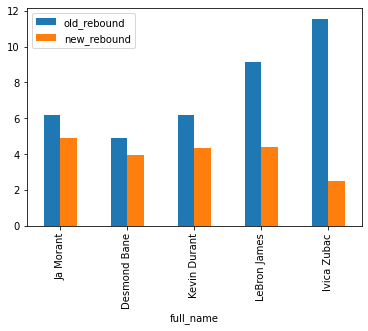

In [ ]:
rebounds = nba_prediction.plot(x="full_name", y=["old_rebound", "new_rebound"], kind="bar")

**Assists**

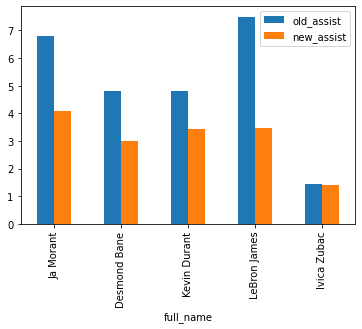

In [ ]:
assists = nba_prediction.plot(x="full_name", y=["old_assist", "new_assist"], kind="bar")

**Steals**

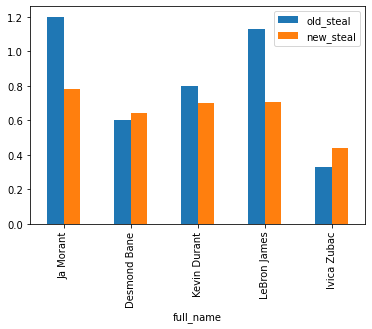

In [ ]:
steals = nba_prediction.plot(x="full_name", y=["old_steal", "new_steal"], kind="bar")

# Conclusion:

Overall, I believe that the model did a pretty good job with assessing the individual statistics for any given starting lineup in the NBA. However, there were a few limitations that served as obstacles during this project. 

This includes:

1) Not having access to advanced statistics, such as plus/minus or per 48 statistics for each player

2) Having limited definition for positions (complex models will tend to take into account average of positions for point predictions)

3) Encontering players with abnormally high usage rates due to a lack of games played

The models will definitely favor players with higher usage rates due to the positive relationship between usage rate and points. This makes it ideal to experiment with high usage rate players and mix and match starting fives with varying usage rates. For example, Russell Westbrook seemed to record better individual statistics when he played with more players with low usage rates as opposed to when he played with more players with medium to high usage rate players. This makes sense because we would expect that if Russell Westbrook was the highest usage rate player in the starting lineup, he would be having the ball for a lot of the possessions, meaning his productivity will increase. On the contrary, Westbrook playing with other players who demand the ball more frequently will affect his individual player statistics as he will have less time with the ball, decreasing his overall productivity. We would be able to apply this same logic for other players with similar usage rates. As for players with small or medium usage rates, they will typically see a decrease in productivity when playing with high usage rate players but see an increase when playing with other small or medium usage rate players. This is because eliminating the presence of a high usage rate player in any given lineup will allow the machine learning to give priority in predictions to those same players, which means they will get a boost in their predicted overall season statistics.